# Name: Jose Dominguez Alonso
# Assignment Name: CA04 - Ensemble Methods


# 1. Data Source and Contents

In [1]:
#import packages
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
#read data using URL
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true' 
data = pd.read_csv(url, encoding = "ISO-8859-1")

In [3]:
#check the data
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
#Check the total number of columns and rows of dataset
data.shape

(48842, 11)

In [5]:
#Count of values per column
data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [6]:
#Number of null values per column
data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [7]:
#Summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [8]:
#Split the data into train set and test set
data_train_set = data[data['flag'] == 'train']
data_test_set = data[data['flag'] == 'test']

In [9]:
#Check train data
data_train_set.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [10]:
#Check test data
data_test_set.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,0
32562,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,0
32563,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1
32564,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,test,1
32565,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25,test,0


In [11]:
#Let's select the independant and dependant variables that we are going to use from the dataset
X_train = pd.get_dummies(data_train_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=data_train_set['y']
X_test=pd.get_dummies(data_test_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=data_test_set['y']

In [13]:
#Let's use Ordinal Encoder to transform categorical variables to numerical variables.
from sklearn import preprocessing
#Let's name it encode to make it easier to know we are encoding now.
encode = preprocessing.OrdinalEncoder()

In [14]:
#Here let's encode the train data set

encode.fit(X_train)
X_train= encode.transform(X_train)
X_train= pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
#Here let's encode the test data set
encode.fit(X_test)
X_test= encode.transform(X_test)
X_test= pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# 2. Finding Optimal Value of a key Hyper-parameter

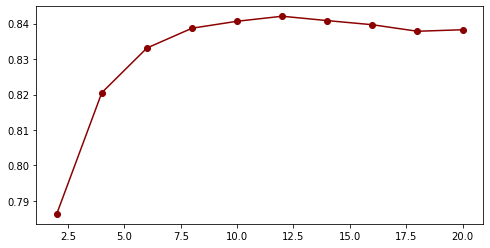

In [37]:
#Looking for the optimal max_depth
results = []
max_depth_option = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_option:
    model = RandomForestClassifier(max_depth=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_option).plot(color = 'darkred', marker='o')

The optimal max_depth is equal to 12.

# 3. Building a Random Forest Model

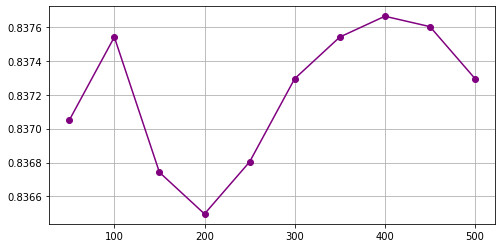

In [16]:
#Importing packages needed
from sklearn.ensemble import RandomForestClassifier

#Building a Random Forest model
results = []
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for estimator in estimator_options:
  forest = RandomForestClassifier(n_estimators = estimator, random_state = 25)
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

#Plotting the accuracy 
plt.figure(figsize=(8,4))
pd.Series(results, estimator_options).plot(color = "purple", marker = "o")
plt.grid()

The optimal n_estimator is equal to 400.

# 4. Building AdaBoost, Gradient Boost (classifier) and XGB Model 

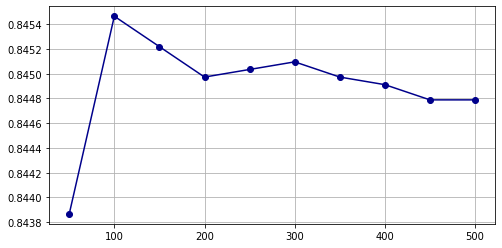

In [19]:
#Importing packages needed
from sklearn.ensemble import AdaBoostClassifier

#Building an AdaBoost model
results = []
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for estimator in estimator_options:
  adaboost = AdaBoostClassifier(n_estimators = estimator, random_state = 25)
  adaboost.fit(X_train, y_train)
  y_pred = adaboost.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

#Plotting the accuracy 
plt.figure(figsize=(8,4))
pd.Series(results, estimator_options).plot(color = "darkblue", marker = "o")
plt.grid()

The optimal n_estimator is equal to 100.

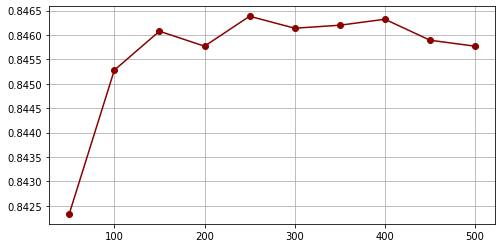

In [20]:
#Importing packages needed
from sklearn.ensemble import GradientBoostingClassifier

#Building a Gradient Boost model
results = []
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for estimator in estimator_options:
  gradboost = GradientBoostingClassifier(n_estimators = estimator, random_state = 25)
  gradboost.fit(X_train, y_train)
  y_pred = gradboost.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

#Plotting the accuracy 
plt.figure(figsize=(8,4))
pd.Series(results, estimator_options).plot(color = "darkred", marker = "o")
plt.grid()

The optimal n_estimator is equal to 250.

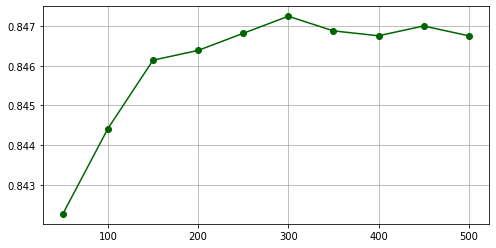

In [21]:
#Importing packages needed 
from xgboost import XGBClassifier

#Building a XGB model
results = []
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for estimator in estimator_options:
  xgboost = XGBClassifier(n_estimators = estimator, random_state = 25)
  xgboost.fit(X_train, y_train)
  y_pred = xgboost.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  results.append(accuracy)

#Plotting the accuracy 
plt.figure(figsize=(8,4))
pd.Series(results, estimator_options).plot(color = "darkgreen", marker = "o")
plt.grid()

The optimal n_estimator is equal to 300.

# 5. Compare Performance

In [39]:
#Evaluating models 
#importing packages needed
from sklearn.metrics import roc_auc_score

#Creating a new dataframe to display performance metrics
perf_metrics = pd.DataFrame(columns = ['RandomForest', 'AdaBoost', 'GradientBoost', 'XGB'],
                            index = ['Accuracy', 'AUC'])

#Random Forest 
forest = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 25)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Calculating accuracy & AUC
rforest_acc = np.mean(y_test == y_pred)
rforest_auc = roc_auc_score(y_test, y_pred)

#AdaBoost 
adaboost = AdaBoostClassifier(n_estimators = 100, random_state = 25)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
#Calculating accuracy & AUC
adaboost_acc = np.mean(y_test == y_pred)
adaboost_auc = roc_auc_score(y_test, y_pred)

#Gradient Boost 
gradboost = GradientBoostingClassifier(n_estimators = 100, max_depth = 12, random_state = 25)
gradboost.fit(X_train, y_train)
y_pred = gradboost.predict(X_test)
#Calculating accuracy & AUC
gradboost_acc = np.mean(y_test == y_pred)
gradboost_auc = roc_auc_score(y_test, y_pred)

#XGB Model 
xgboost = XGBClassifier(n_estimators = 100, max_depth = 12, random_state = 25)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
#Calculating accuracy & AUC
xgb_acc = np.mean(y_test == y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

#Displaying the new dataframe where you can compare the performance of the different trees 
perf_metrics.loc['Accuracy'] = pd.Series({'RandomForest':rforest_acc, 'AdaBoost':adaboost_acc, 
                                          'GradientBoost':gradboost_acc, 'XGB':xgb_acc})
perf_metrics.loc['AUC'] = pd.Series({'RandomForest':rforest_auc, 'AdaBoost':adaboost_auc,
                                     'GradientBoost':gradboost_auc, 'XGB':xgb_auc})
print(perf_metrics)
print('Common Hyper-Parameters:')
print('n_estimator: 100')
print('max_depth: 12')
print('random_state: 25')

         RandomForest  AdaBoost GradientBoost       XGB
Accuracy     0.841717  0.845464      0.836619   0.84012
AUC          0.737891  0.744115      0.746048  0.750225
Common Hyper-Parameters:
n_estimator: 100
max_depth: 12
random_state: 25


As you can see, Adaboost has the best performance metricscomparing it to the other trees. 